In [1]:
#imports
import pandas as pd #Python data analysis library
import numpy as np #Python scientific computing
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns #Python visualization library
import matplotlib.pyplot as plt #For plotting

In [2]:
trainDf = pd.read_csv("order_products__train.csv")
orderDf = pd.read_csv("orders.csv")
productDf = pd.read_csv("products.csv")
priorDf = pd.read_csv("order_products__prior.csv")

In [3]:
priorDf.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
priorDf.reordered.value_counts()

1    19126536
0    13307953
Name: reordered, dtype: int64

In [5]:
priorDf.shape

(32434489, 4)

In [6]:
trainDf.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
trainDf.shape

(1384617, 4)

In [8]:
trainDf = trainDf.append(priorDf,ignore_index = True)
trainDf.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
trainDf.shape

(33819106, 4)

In [10]:
orderDf.shape

(3421083, 7)

In [11]:
orderDf.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


#get distribution of number of orders per customer
sns.set_style('whitegrid')
customerNumOrderFrame = orderDf.groupby("user_id",as_index = False)["order_number"].max()
num_bins = 10
n, bins, patches = plt.hist(customerNumOrderFrame["order_number"] , num_bins, normed=1, color='blue', alpha=0.5)
mu = customerNumOrderFrame["order_number"].mean()
sigma = customerNumOrderFrame["order_number"].std()

C:\Users\shivathk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Number of Orders per Customer Distribution')

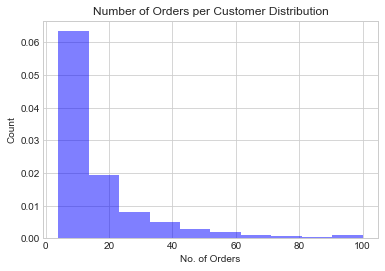

In [12]:
#get distribution of number of orders per customer
sns.set_style('whitegrid')
customerNumOrderFrame = orderDf.groupby("user_id",as_index = False)["order_number"].max()
num_bins = 10
n, bins, patches = plt.hist(customerNumOrderFrame["order_number"] , num_bins, normed=1, color='blue', alpha=0.5)
plt.xlabel("No. of Orders")
plt.ylabel("Count")
plt.title("Number of Orders per Customer Distribution")

#### Looking at the histogram it seems to be skewed and appropriate distribution will be an exponential function.

For counting each product, we can assign reordered column as 1 

In [13]:
trainDf['reordered'] = 1 


In [14]:
trainDf.reordered.value_counts()

1    33819106
Name: reordered, dtype: int64

In [15]:
productCountDf = trainDf.groupby("product_id",as_index = False)["order_id"].count()
productCountDf.head()

,product_id,order_id
0,1,1928
1,2,94
2,3,283
3,4,351
4,5,16


In [16]:
#Top 100 most frequently purchased products
topLev = 100

#Here order_id is the count so we need to sort the data frame w.r.t order_id
productCountDf = productCountDf.sort_values("order_id",ascending = False)
productCountDf.head()

,product_id,order_id
24849,24852,491291
13173,13176,394930
21134,21137,275577
21900,21903,251705
47205,47209,220877


In [17]:
topProdFrame = productCountDf.iloc[0:topLev,:]
topProdFrame = topProdFrame.merge(productDf,on = "product_id")
productId= topProdFrame.loc[:,["product_id"]]
productId.head()

,product_id
0,24852
1,13176
2,21137
3,21903
4,47209


Days of Orders in a week

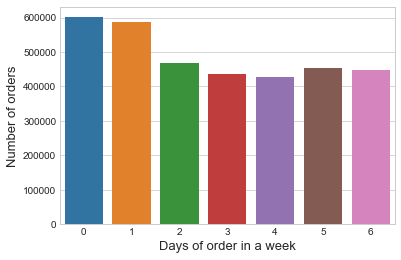

In [18]:
grouped = orderDf.groupby("order_id")["order_dow"].aggregate("sum").reset_index()
grouped = grouped.order_dow.value_counts()

sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Days of order in a week', fontsize=13)
plt.show()


Now we will filter the orders and get orders containting the the most frequently purchased products

In [19]:
df = trainDf[0:0]
df

,order_id,product_id,add_to_cart_order,reordered


In [20]:
for i in range(0,99):
    pId = productId.iloc[i]['product_id'] 
    stDf = trainDf[trainDf.product_id == pId ]
    df = df.append(stDf,ignore_index = False)

In [21]:
df

,order_id,product_id,add_to_cart_order,reordered
115,226,24852,2,1
156,473,24852,2,1
196,878,24852,2,1
272,1042,24852,1,1
297,1139,24852,1,1
323,1145,24852,1,1
401,1468,24852,1,1
424,1572,24852,3,1
464,1591,24852,19,1
676,2068,24852,1,1


In [22]:
basket = df.groupby(['order_id', 'product_id'])['reordered'].sum().unstack().reset_index().fillna(0).set_index('order_id')

In [23]:
basket.shape

(2441083, 99)

In [24]:
basket.size

241667217

In [25]:
basket.head()

product_id,196,3957,4210,4605,4799,4920,5077,5450,5785,5876,...,46667,46906,46979,47144,47209,47626,47766,48679,49235,49683
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1    

In [29]:
basket_sets = basket.applymap(encode_units)

In [30]:
basket_sets.head()

product_id,196,3957,4210,4605,4799,4920,5077,5450,5785,5876,...,46667,46906,46979,47144,47209,47626,47766,48679,49235,49683
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now that the data is structured properly, we can generate frequent item sets that have a support of at least 1% 

#### Build up the frequent items


In [31]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [32]:
frequent_itemsets.head()

,support,itemsets
0,0.015279,(196)
1,0.016088,(3957)
2,0.015144,(4210)
3,0.031514,(4605)
4,0.015439,(4799)


In [33]:
# Create the rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(4920),(24852),0.035537,0.201259,0.010551,0.296906,1.475240,0.003399,1.136037
1,(24852),(4920),0.201259,0.035537,0.010551,0.052425,1.475240,0.003399,1.017823
2,(13176),(21137),0.161785,0.112891,0.026505,0.163832,1.451233,0.008241,1.060921
3,(21137),(13176),0.112891,0.161785,0.026505,0.234787,1.451233,0.008241,1.095402
4,(13176),(21903),0.161785,0.103112,0.021551,0.133208,1.291881,0.004869,1.034722
5,(21903),(13176),0.103112,0.161785,0.021551,0.209007,1.291881,0.004869,1.059699
6,(13176),(22935),0.161785,0.048223,0.010476,0.064756,1.342844,0.002675,1.017678
7,(22935),(13176),0.048223,0.161785,0.010476,0.217252,1.342844,0.002675,1.070862
8,(13176),(27845),0.161785,0.058504,0.011306,0.069883,1.194505,0.001841,1.012234
9,(27845),(13176),0.058504,0.161785,0.011306,0.193253,1.194505,0.001841,1.039006


#### lift > 1 implies that there is a positive relationship 

In [34]:
rules[ (rules['lift'] >= 2) &
       (rules['confidence'] >= 0.1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22,(21137),(27966),0.112891,0.058418,0.014556,0.128940,2.207206,0.007961,1.080962
23,(27966),(21137),0.058418,0.112891,0.014556,0.249174,2.207206,0.007961,1.181511
25,(39275),(21137),0.043024,0.112891,0.010252,0.238274,2.110653,0.005395,1.164604
50,(26209),(47626),0.060080,0.065869,0.011879,0.197723,3.001750,0.007922,1.164349
51,(47626),(26209),0.065869,0.060080,0.011879,0.180345,3.001750,0.007922,1.146726
52,(47209),(27966),0.090483,0.058418,0.010984,0.121389,2.077938,0.005698,1.071671
53,(27966),(47209),0.058418,0.090483,0.010984,0.188018,2.077938,0.005698,1.120120
54,(47626),(47766),0.065869,0.075468,0.010555,0.160244,2.123337,0.005584,1.100953
55,(47766),(47626),0.075468,0.065869,0.010555,0.139862,2.123337,0.005584,1.086025
